In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# MNIST DATASET

In [4]:
# Data Loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

# split train dataset for train and validation
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Filter out zeros from training data
train_data = []
train_labels = []
for data, label in train_dataset:
    if label != 0:
        train_data.append(data.view(-1))
        train_labels.append(label)

# Keep all training data
train_data = torch.stack(train_data)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Keep all validation data
val_data = torch.stack([data.view(-1) for data, _ in val_set])
val_labels = torch.tensor([label for _, label in val_set])
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=128)

# Keep all test data
test_data = torch.stack([data.view(-1) for data, _ in test_dataset])
test_labels = torch.tensor([label for _, label in test_dataset])
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=128)


In [7]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
val_data.shape

torch.Size([10000, 784])

In [3]:
print(torch.unique(torch.tensor(val_labels), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1002, 1170,  943, 1052,  955,  901,  965, 1055,  976,  981]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_15684/435634570.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_15684/435634570.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


In [4]:
# ------------------- -------------------
# Decrease amount of 1-9 digits in validation data set to 1/9 of its current amount
# ------------------- -------------------

indices_1_9 = (val_labels != 0).nonzero(as_tuple=True)[0]
indices_1_9 = val_labels != 0
indices_0 = val_labels == 0

print(len(val_data[indices_0]))
print(len(val_data[indices_1_9]))

# Randomly choose 1000 examples from val_data[indices_1_9]
num_samples = 1000
random_indices = torch.randperm(len(val_data[indices_1_9]))[:num_samples]
val_data_reduced = val_data[indices_1_9][random_indices]
val_labels_reduced = val_labels[indices_1_9][random_indices]

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

val_data_reduced = torch.cat((val_data_reduced, val_data[indices_0]), dim=0)
val_labels_reduced = torch.cat((val_labels_reduced, val_labels[indices_0]), dim=0)

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

# Reduced validation data loader
val_loader_reduced = DataLoader(TensorDataset(val_data_reduced, val_labels_reduced), batch_size=128, shuffle=True) # shuffle is optional

1002
8998
1000
1000
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([131, 105, 119, 112, 105,  94, 108, 110, 116]))
2002
2002
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1002,  131,  105,  119,  112,  105,   94,  108,  110,  116]))


In [5]:
print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1002,  131,  105,  119,  112,  105,   94,  108,  110,  116]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_15684/2262724207.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_15684/2262724207.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


# Autoencoders

## Autoencoders definitions

In [6]:
# SSIM Loss implementation
class SSIM(nn.Module):
    def __init__(self, window_size=11):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.channel = 1
        self.window = self.create_window()

    def gaussian(self, window_size, sigma=1.5):
        gauss = torch.Tensor([np.exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
        return gauss/gauss.sum()

    def create_window(self):
        _1D_window = self.gaussian(self.window_size).unsqueeze(1)
        _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
        window = _2D_window.expand(self.channel, 1, self.window_size, self.window_size).contiguous()
        return window

    def forward(self, img1, img2):
        window = self.window.to(img1.device)
        return 1 - self._ssim(img1, img2, window)

    def _ssim(self, img1, img2, window):
        mu1 = nn.functional.conv2d(img1, window, padding=self.window_size//2, groups=self.channel)
        mu2 = nn.functional.conv2d(img2, window, padding=self.window_size//2, groups=self.channel)

        mu1_sq = mu1.pow(2)
        mu2_sq = mu2.pow(2)
        mu1_mu2 = mu1 * mu2

        sigma1_sq = nn.functional.conv2d(img1 * img1, window, padding=self.window_size//2, groups=self.channel) - mu1_sq
        sigma2_sq = nn.functional.conv2d(img2 * img2, window, padding=self.window_size//2, groups=self.channel) - mu2_sq
        sigma12 = nn.functional.conv2d(img1 * img2, window, padding=self.window_size//2, groups=self.channel) - mu1_mu2

        C1 = 0.01**2
        C2 = 0.03**2

        ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))
        return ssim_map.mean()
    
# za duzy latent space
# zmniejszyc liczbe neuronow
# weight decay mozna zmniejszyc
# oslabic architekture
# czasami ciezko jest zredukowac blad, bo model sie nauczy, zeby zwracac to samo co wejscie

# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# BigAutoencoder Model
class BigAutoencoder(nn.Module):
    def __init__(self):
        super(BigAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model
class SmallAutoencoder(nn.Module):
    def __init__(self):
        super(SmallAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## Autoencoder model

In [7]:
# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

# train 
num_epochs = 20
model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        batch = batch.to(device)
        batch_reshaped = batch
        
        optimizer.zero_grad()
        output = model(batch)

        loss = criterion(output, batch_reshaped)
        loss.backward()
        optimizer.step()

    # validation loss
    with torch.no_grad():
        val_loss = 0
        for val_batch, _ in val_loader:
            val_batch = val_batch.to(device)
            val_batch_reshaped = val_batch
            val_output = model(val_batch)
            val_loss += criterion(val_output, val_batch_reshaped)
        val_loss /= len(val_loader)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train_loss: {loss.item():.4f}, Val_loss: {val_loss.item():.4f}')


Epoch [1/20], Train_loss: 0.0347, Val_loss: 0.0365
Epoch [2/20], Train_loss: 0.0267, Val_loss: 0.0270
Epoch [3/20], Train_loss: 0.0205, Val_loss: 0.0231
Epoch [4/20], Train_loss: 0.0210, Val_loss: 0.0216
Epoch [5/20], Train_loss: 0.0173, Val_loss: 0.0198
Epoch [6/20], Train_loss: 0.0158, Val_loss: 0.0179
Epoch [7/20], Train_loss: 0.0145, Val_loss: 0.0166
Epoch [8/20], Train_loss: 0.0157, Val_loss: 0.0153
Epoch [9/20], Train_loss: 0.0123, Val_loss: 0.0140
Epoch [10/20], Train_loss: 0.0121, Val_loss: 0.0132
Epoch [11/20], Train_loss: 0.0131, Val_loss: 0.0124
Epoch [12/20], Train_loss: 0.0109, Val_loss: 0.0122
Epoch [13/20], Train_loss: 0.0113, Val_loss: 0.0118
Epoch [14/20], Train_loss: 0.0115, Val_loss: 0.0115
Epoch [15/20], Train_loss: 0.0108, Val_loss: 0.0107
Epoch [16/20], Train_loss: 0.0092, Val_loss: 0.0105
Epoch [17/20], Train_loss: 0.0089, Val_loss: 0.0101
Epoch [18/20], Train_loss: 0.0093, Val_loss: 0.0098
Epoch [19/20], Train_loss: 0.0088, Val_loss: 0.0098
Epoch [20/20], Train_

In [8]:
thresholds = torch.linspace(0, 1, 20)

model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for val_batch, val_label in val_loader_reduced:
        for example, label in zip(val_batch, val_label):
            example = example.view(-1)
            example = example.to(device)
            out = model(example)
            all_predictions.append(criterion(example, out).unsqueeze(0))
            all_labels.append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
print(len(all_predictions), len(all_labels), len(val_data_reduced))
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

assert len(all_predictions) == len(all_labels)
assert len(all_predictions) == len(val_data_reduced)

# sort all_predictions and all_labels according to all_predictions
all_predictions, indices = torch.sort(all_predictions, descending=True)
sorted_labels = [all_labels[i] for i in indices.cpu()]
neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels])
sorted_labels = torch.tensor(sorted_labels)

tprs = []
fprs = []
f1_scores = []
precisions = []
recalls = []

# indices of 0
zeros_indices = sorted_labels == 0
# indices of other digits
other_indices = sorted_labels != 0
for threshold in thresholds:
    positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), threshold)
    negative_class = all_predictions < torch.quantile(all_predictions.cpu(), threshold)

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    fprs.append(fpr.cpu())
    tprs.append(tpr.cpu())

    f1_score = 2*tp/(2*tp + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)

    f1_scores.append(f1_score.cpu())
    precisions.append(precision.cpu())
    recalls.append(recall.cpu())

2002 2002 2002


In [9]:
# Find the threshold with the highest F1 score
best_threshold_index = torch.argmax(torch.tensor(f1_scores))
best_threshold = thresholds[best_threshold_index]
best_precision = precisions[best_threshold_index]
best_recall = recalls[best_threshold_index]

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Precision at Best Threshold: {best_precision:.4f}')
print(f'Recall at Best Threshold: {best_recall:.4f}')

Best Threshold: 0.4211
Precision at Best Threshold: 0.8162
Recall at Best Threshold: 0.9441


In [10]:
positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])
negative_class = all_predictions < torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])

tp = positive_class[zeros_indices].sum()
fn = negative_class[zeros_indices].sum()
tn = negative_class[other_indices].sum()
fp = positive_class[other_indices].sum()

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

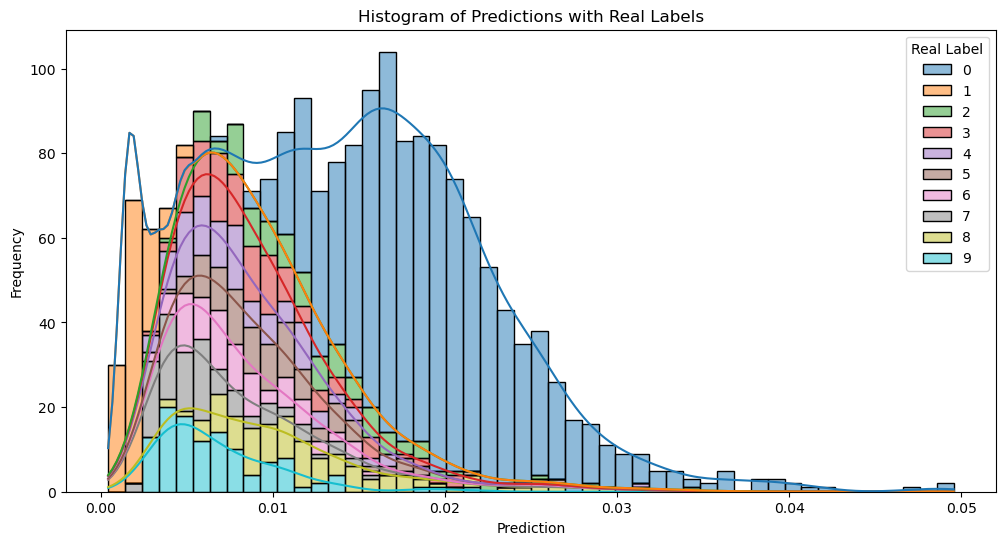

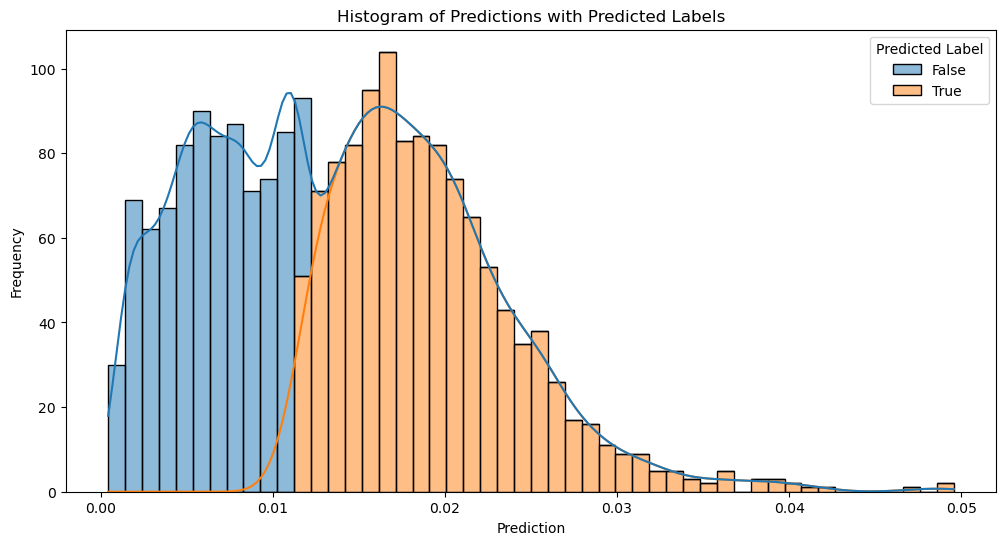

In [11]:
import seaborn as sns
import pandas as pd

# Convert predictions and labels to numpy arrays for plotting
all_predictions_np = all_predictions.cpu().numpy()
sorted_labels_np = sorted_labels.cpu().numpy()
predicted_labels_np = positive_class.cpu().numpy()

# Create a DataFrame for easier plotting
data = {
    'Prediction': all_predictions_np,
    'Real Label': sorted_labels_np,
    'Predicted Label': predicted_labels_np
}

df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Real Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Predicted Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

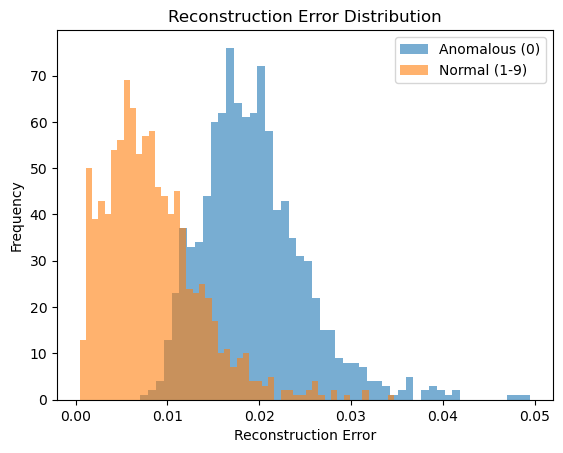

In [12]:
# Plot histogram of reconstruction errors
plt.figure()
plt.hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
plt.hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

In [13]:
# # Function to calculate reconstruction loss
# def calculate_reconstruction_loss(data, model):
#     reconstructions = model(data)
#     reconstruction_errors = torch.mean(torch.abs(data - reconstructions), axis=1)
#     return reconstruction_errors

# # Calculate reconstruction loss for normal and anomalous images
# for i in range(10):
#     anomalous_images = test_data[test_labels == i]
#     anomalous_images_tensor = torch.tensor(anomalous_images, dtype=torch.float32).to(device)
#     reconstruction_loss_anomalous = calculate_reconstruction_loss(anomalous_images_tensor, model)
#     print(f"Anomalous images of number {i}: {reconstruction_loss_anomalous.mean()}")


# reconstruction_loss_normal = calculate_reconstruction_loss(next(iter(test_loader))[0].to(device), model)
# print(f"Normal images: {reconstruction_loss_normal.mean()}")


In [14]:
# # Reconstruct images from test_loader and plot those with the biggest loss
# import matplotlib.pyplot as plt

# # Get a batch of test data
# test_images, _ = next(iter(test_loader))
# test_images = test_images.to(device)

# # Calculate reconstruction loss for the batch
# reconstruction_losses = calculate_reconstruction_loss(test_images, model)
# print(reconstruction_losses)

# # Get indices of images with the biggest loss
# num_images_to_plot = 5
# _, indices = torch.topk(reconstruction_losses, num_images_to_plot)

# print(reconstruction_losses[indices])

# # Plot the original and reconstructed images with the biggest loss
# fig, axes = plt.subplots(num_images_to_plot, 2, figsize=(10, 10))

# for i, idx in enumerate(indices):
#     original_image = test_images[idx].cpu().view(28, 28).detach().numpy()
#     reconstructed_image = model(test_images[idx].unsqueeze(0)).cpu().view(28, 28).detach().numpy()

#     axes[i, 0].imshow(original_image, cmap='gray')
#     axes[i, 0].set_title(f'Original Image {i+1}')
#     axes[i, 0].axis('off')

#     axes[i, 1].imshow(reconstructed_image, cmap='gray')
#     axes[i, 1].set_title(f'Reconstructed Image {i+1}')
#     axes[i, 1].axis('off')

# plt.tight_layout()
# plt.show()

In [15]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Get predictions and actual labels
# predictions = []
# actual = []

# model.eval()
# with torch.no_grad():
#     for data, labels in test_loader:
#         data = data.to(device)
#         outputs = model(data)
#         reconstruction_errors = torch.mean(torch.abs(data - outputs), axis=1)
#         preds = reconstruction_errors > threshold
#         predictions.extend(preds.cpu().numpy())
#         actual.extend(labels.cpu().numpy())

# # Convert lists to numpy arrays
# predictions = np.array(predictions)
# actual = np.array(actual)

# # Calculate metrics
# accuracy = accuracy_score(actual, predictions)
# precision = precision_score(actual, predictions, average='binary')
# recall = recall_score(actual, predictions, average='binary')
# f1 = f1_score(actual, predictions, average='binary')

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

## BigAutoencoder Model

Epoch [1/30], Train_loss: 0.0538, Val_loss: 0.0399
Epoch [2/30], Train_loss: 0.0324, Val_loss: 0.0310
Epoch [3/30], Train_loss: 0.0264, Val_loss: 0.0276
Epoch [4/30], Train_loss: 0.0235, Val_loss: 0.0248
Epoch [5/30], Train_loss: 0.0212, Val_loss: 0.0230
Epoch [6/30], Train_loss: 0.0194, Val_loss: 0.0213
Epoch [7/30], Train_loss: 0.0179, Val_loss: 0.0202
Epoch [8/30], Train_loss: 0.0168, Val_loss: 0.0191
Epoch [9/30], Train_loss: 0.0160, Val_loss: 0.0185
Epoch [10/30], Train_loss: 0.0152, Val_loss: 0.0178
Epoch [11/30], Train_loss: 0.0145, Val_loss: 0.0174
Epoch [12/30], Train_loss: 0.0139, Val_loss: 0.0166
Epoch [13/30], Train_loss: 0.0135, Val_loss: 0.0165
Epoch [14/30], Train_loss: 0.0131, Val_loss: 0.0160
Epoch [15/30], Train_loss: 0.0128, Val_loss: 0.0160
Epoch [16/30], Train_loss: 0.0125, Val_loss: 0.0155
Epoch [17/30], Train_loss: 0.0123, Val_loss: 0.0151
Epoch [18/30], Train_loss: 0.0120, Val_loss: 0.0148
Epoch [19/30], Train_loss: 0.0118, Val_loss: 0.0148
Epoch [20/30], Train_

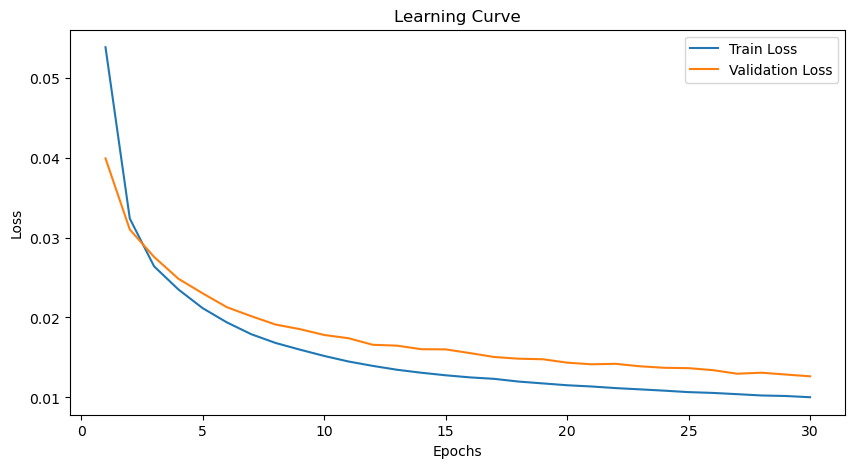

In [16]:
# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = BigAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

# Lists to store losses
train_losses = []
val_losses = []

# train 
num_epochs = 30
model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        batch_reshaped = batch
        
        optimizer.zero_grad()
        output = model(batch)

        loss = criterion(output, batch_reshaped)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # validation loss
    with torch.no_grad():
        val_loss = 0
        for val_batch, _ in val_loader:
            val_batch = val_batch.to(device)
            val_batch_reshaped = val_batch
            val_output = model(val_batch)
            val_loss += criterion(val_output, val_batch_reshaped)
        val_loss /= len(val_loader)
        val_losses.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [17]:
thresholds = torch.linspace(0, 1, 20)

model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for val_batch, val_label in val_loader_reduced:
        for example, label in zip(val_batch, val_label):
            example = example.view(-1)
            example = example.to(device)
            out = model(example)
            all_predictions.append(criterion(example, out).unsqueeze(0))
            all_labels.append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
print(len(all_predictions), len(all_labels), len(val_data_reduced))
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

assert len(all_predictions) == len(all_labels)
assert len(all_predictions) == len(val_data_reduced)

# sort all_predictions and all_labels according to all_predictions
all_predictions, indices = torch.sort(all_predictions, descending=True)
sorted_labels = [all_labels[i] for i in indices.cpu()]
neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels])
sorted_labels = torch.tensor(sorted_labels)

tprs = []
fprs = []
f1_scores = []
precisions = []
recalls = []

# indices of 0
zeros_indices = sorted_labels == 0
# indices of other digits
other_indices = sorted_labels != 0
for threshold in thresholds:
    positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), threshold)
    negative_class = all_predictions < torch.quantile(all_predictions.cpu(), threshold)

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    fprs.append(fpr.cpu())
    tprs.append(tpr.cpu())

    f1_score = 2*tp/(2*tp + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)

    f1_scores.append(f1_score.cpu())
    precisions.append(precision.cpu())
    recalls.append(recall.cpu())

2002 2002 2002


In [18]:
# Find the threshold with the highest F1 score
best_threshold_index = torch.argmax(torch.tensor(f1_scores))
best_threshold = thresholds[best_threshold_index]
best_precision = precisions[best_threshold_index]
best_recall = recalls[best_threshold_index]

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Precision at Best Threshold: {best_precision:.4f}')
print(f'Recall at Best Threshold: {best_recall:.4f}')

Best Threshold: 0.4737
Precision at Best Threshold: 0.9393
Recall at Best Threshold: 0.9880


In [19]:
positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])
negative_class = all_predictions < torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])

tp = positive_class[zeros_indices].sum()
fn = negative_class[zeros_indices].sum()
tn = negative_class[other_indices].sum()
fp = positive_class[other_indices].sum()

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

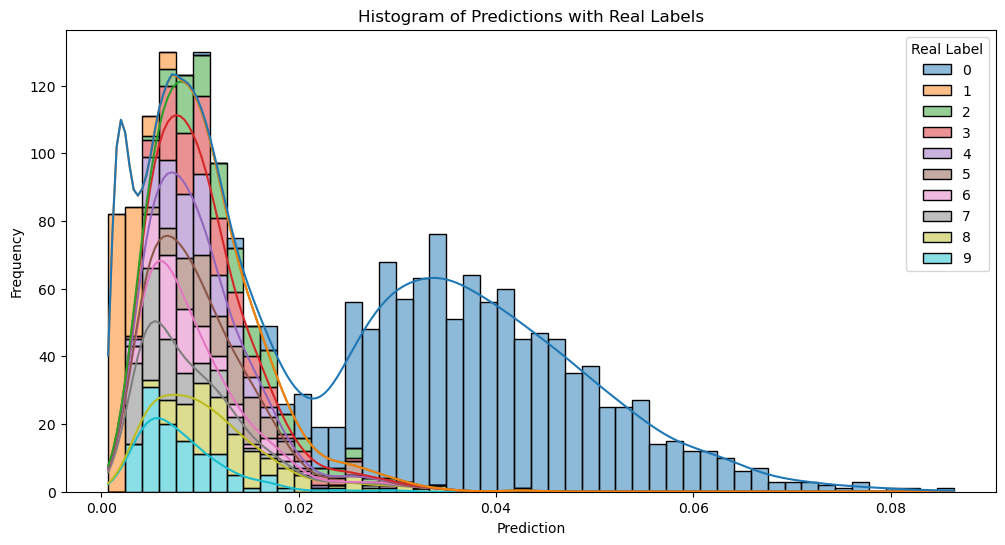

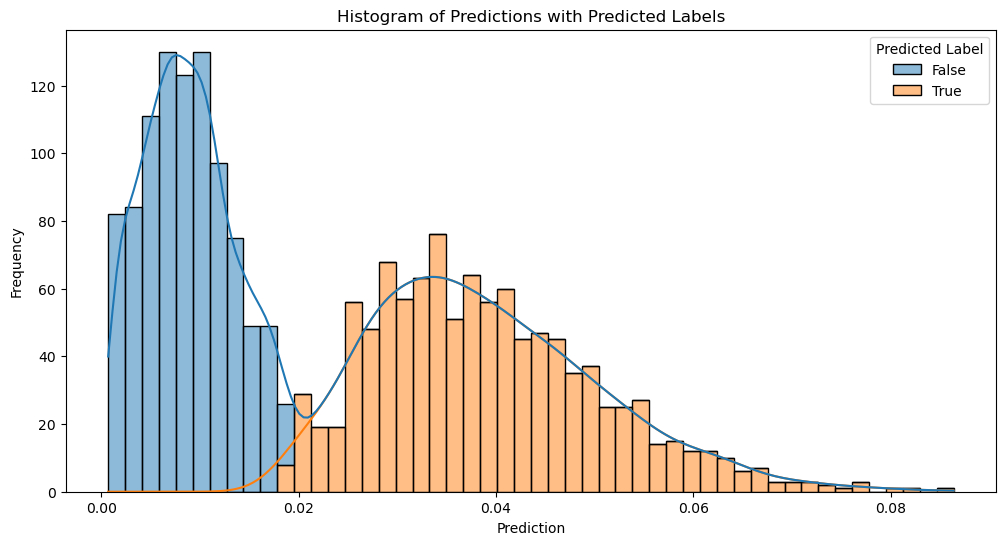

In [20]:
import seaborn as sns
import pandas as pd

# Convert predictions and labels to numpy arrays for plotting
all_predictions_np = all_predictions.cpu().numpy()
sorted_labels_np = sorted_labels.cpu().numpy()
predicted_labels_np = positive_class.cpu().numpy()

# Create a DataFrame for easier plotting
data = {
    'Prediction': all_predictions_np,
    'Real Label': sorted_labels_np,
    'Predicted Label': predicted_labels_np
}

df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Real Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Predicted Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

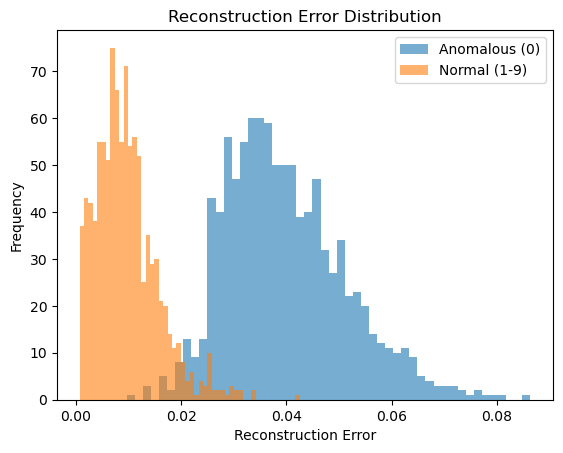

In [21]:
# Plot histogram of reconstruction errors
plt.figure()
plt.hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
plt.hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

## SmallAutoencoder

Epoch [1/20], Train_loss: 0.0506, Val_loss: 0.0346
Epoch [2/20], Train_loss: 0.0270, Val_loss: 0.0257
Epoch [3/20], Train_loss: 0.0216, Val_loss: 0.0220
Epoch [4/20], Train_loss: 0.0187, Val_loss: 0.0200
Epoch [5/20], Train_loss: 0.0166, Val_loss: 0.0175
Epoch [6/20], Train_loss: 0.0150, Val_loss: 0.0162
Epoch [7/20], Train_loss: 0.0138, Val_loss: 0.0145
Epoch [8/20], Train_loss: 0.0128, Val_loss: 0.0136
Epoch [9/20], Train_loss: 0.0121, Val_loss: 0.0133
Epoch [10/20], Train_loss: 0.0115, Val_loss: 0.0125
Epoch [11/20], Train_loss: 0.0111, Val_loss: 0.0120
Epoch [12/20], Train_loss: 0.0106, Val_loss: 0.0114
Epoch [13/20], Train_loss: 0.0102, Val_loss: 0.0110
Epoch [14/20], Train_loss: 0.0099, Val_loss: 0.0107
Epoch [15/20], Train_loss: 0.0096, Val_loss: 0.0102
Epoch [16/20], Train_loss: 0.0093, Val_loss: 0.0100
Epoch [17/20], Train_loss: 0.0092, Val_loss: 0.0101
Epoch [18/20], Train_loss: 0.0090, Val_loss: 0.0096
Epoch [19/20], Train_loss: 0.0088, Val_loss: 0.0094
Epoch [20/20], Train_

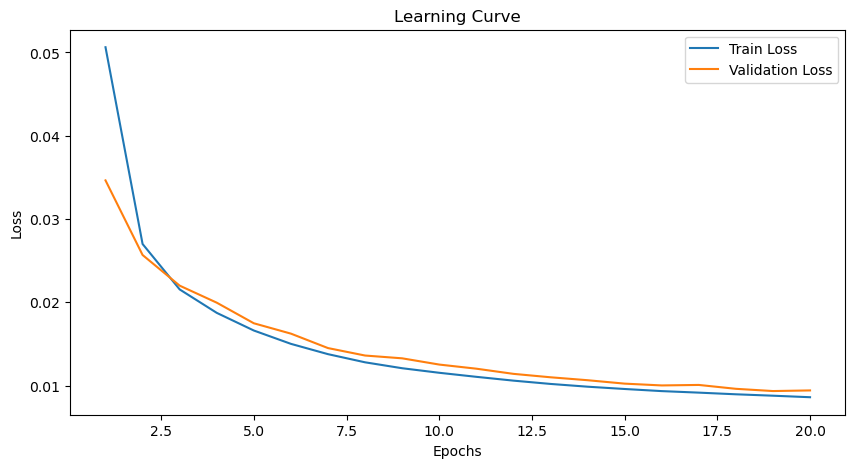

In [22]:
# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = SmallAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)

# Lists to store losses
train_losses = []
val_losses = []

# train 
num_epochs = 20
model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        batch_reshaped = batch
        
        optimizer.zero_grad()
        output = model(batch)

        loss = criterion(output, batch_reshaped)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
    
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    # validation loss
    with torch.no_grad():
        val_loss = 0
        for val_batch, _ in val_loader:
            val_batch = val_batch.to(device)
            val_batch_reshaped = val_batch
            val_output = model(val_batch)
            val_loss += criterion(val_output, val_batch_reshaped)
        val_loss /= len(val_loader)
        val_losses.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [23]:
thresholds = torch.linspace(0, 1, 20)

model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for val_batch, val_label in val_loader_reduced:
        for example, label in zip(val_batch, val_label):
            example = example.view(-1)
            example = example.to(device)
            out = model(example)
            all_predictions.append(criterion(example, out).unsqueeze(0))
            all_labels.append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
print(len(all_predictions), len(all_labels), len(val_data_reduced))
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

assert len(all_predictions) == len(all_labels)
assert len(all_predictions) == len(val_data_reduced)

# sort all_predictions and all_labels according to all_predictions
all_predictions, indices = torch.sort(all_predictions, descending=True)
sorted_labels = [all_labels[i] for i in indices.cpu()]
neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels])
sorted_labels = torch.tensor(sorted_labels)

tprs = []
fprs = []
f1_scores = []
precisions = []
recalls = []

# indices of 0
zeros_indices = sorted_labels == 0
# indices of other digits
other_indices = sorted_labels != 0
for threshold in thresholds:
    positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), threshold)
    negative_class = all_predictions < torch.quantile(all_predictions.cpu(), threshold)

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    fprs.append(fpr.cpu())
    tprs.append(tpr.cpu())

    f1_score = 2*tp/(2*tp + fp + fn)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)

    f1_scores.append(f1_score.cpu())
    precisions.append(precision.cpu())
    recalls.append(recall.cpu())

2002 2002 2002


In [24]:
# Find the threshold with the highest F1 score
best_threshold_index = torch.argmax(torch.tensor(f1_scores))
best_threshold = thresholds[best_threshold_index]
best_precision = precisions[best_threshold_index]
best_recall = recalls[best_threshold_index]

print(f'Best Threshold: {best_threshold:.4f}')
print(f'Precision at Best Threshold: {best_precision:.4f}')
print(f'Recall at Best Threshold: {best_recall:.4f}')

Best Threshold: 0.4737
Precision at Best Threshold: 0.7713
Recall at Best Threshold: 0.8114


In [25]:
positive_class = all_predictions >= torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])
negative_class = all_predictions < torch.quantile(all_predictions.cpu(), thresholds[best_threshold_index])

tp = positive_class[zeros_indices].sum()
fn = negative_class[zeros_indices].sum()
tn = negative_class[other_indices].sum()
fp = positive_class[other_indices].sum()

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

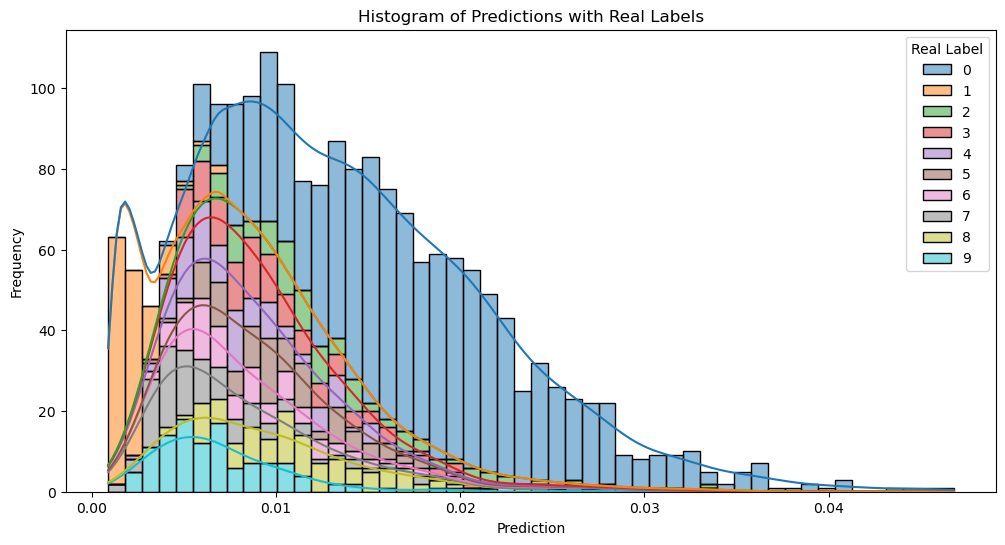

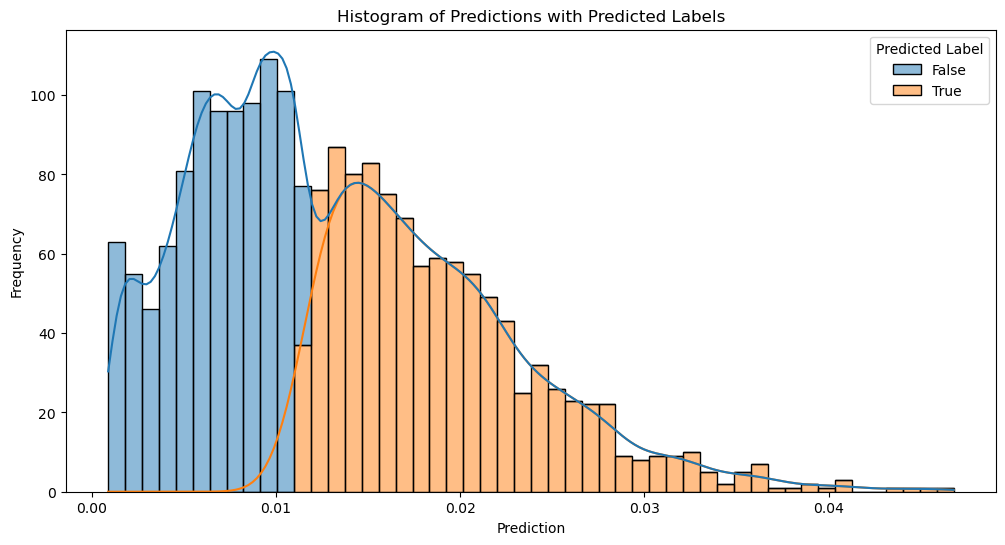

In [26]:
import seaborn as sns
import pandas as pd

# Convert predictions and labels to numpy arrays for plotting
all_predictions_np = all_predictions.cpu().numpy()
sorted_labels_np = sorted_labels.cpu().numpy()
predicted_labels_np = positive_class.cpu().numpy()

# Create a DataFrame for easier plotting
data = {
    'Prediction': all_predictions_np,
    'Real Label': sorted_labels_np,
    'Predicted Label': predicted_labels_np
}

df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Real Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of Predictions with Predicted Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

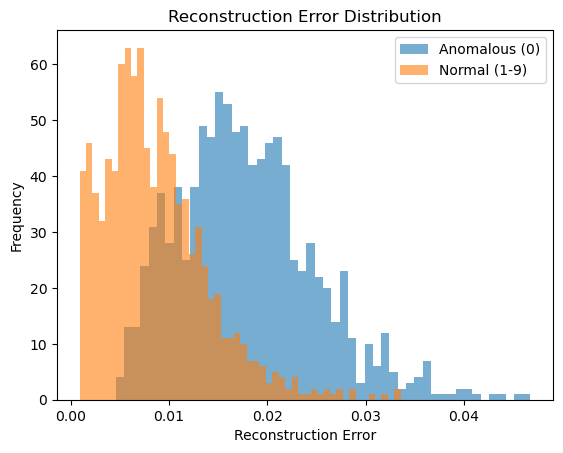

In [27]:
# Plot histogram of reconstruction errors
plt.figure()
plt.hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
plt.hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()

In [28]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.mu_layer = nn.Linear(32, 16)
        self.logvar_layer = nn.Linear(32, 16)
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def encode(self, x):
        h = self.encoder(x)
        return self.mu_layer(h), self.logvar_layer(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
vae_model = VAE().to(device)
optimizer = torch.optim.Adam(vae_model.parameters(), lr=2e-3)

# train 
num_epochs = 20
vae_model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae_model(batch)
        loss = vae_loss(recon_batch, batch, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader.dataset):.4f}')

# Evaluate and create histogram of predictions
vae_model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for val_batch, val_label in val_loader_reduced:
        for example, label in zip(val_batch, val_label):
            example = example.view(-1).to(device)
            recon_example, mu, logvar = vae_model(example)
            all_predictions.append(vae_loss(recon_example, example, mu, logvar).unsqueeze(0))
            all_labels.append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

# sort all_predictions and all_labels according to all_predictions
all_predictions, indices = torch.sort(all_predictions, descending=True)
sorted_labels = [all_labels[i] for i in indices.cpu()]
sorted_labels = torch.tensor(sorted_labels)

# Convert predictions and labels to numpy arrays for plotting
all_predictions_np = all_predictions.cpu().numpy()
sorted_labels_np = sorted_labels.cpu().numpy()

# Create a DataFrame for easier plotting
data = {
    'Prediction': all_predictions_np,
    'Real Label': sorted_labels_np
}

df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True)
plt.title('Histogram of VAE Predictions with Real Labels')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

Epoch [1/20], Loss: 198.6506
Epoch [2/20], Loss: 160.5536
Epoch [3/20], Loss: 144.7083
Epoch [4/20], Loss: 139.8419
Epoch [5/20], Loss: 137.0372
Epoch [6/20], Loss: 135.0424
Epoch [7/20], Loss: 133.5590
Epoch [8/20], Loss: 132.6118
Epoch [9/20], Loss: 131.7500


KeyboardInterrupt: 